In [ ]:
import cv2
import numpy as np
from skimage import io
import matplotlib.pylab as plt

In [ ]:
def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
def compute_lbp_pixel(center, pixels):
    binary_values = (pixels >= center) * 1
    decimal_value = np.sum(binary_values * (2 ** np.arange(8)[::-1]))
    return decimal_value

In [ ]:
def compute_lbp(image):
    height, width = image.shape
    lbp_result = np.zeros((height-2, width-2), dtype=np.uint8)

    for i in range(1, height-1):
        for j in range(1, width-1):
            center = image[i, j]
            neighbors = [
                image[i-1, j-1], image[i-1, j], image[i-1, j+1],
                image[i, j+1], image[i+1, j+1], image[i+1, j],
                image[i+1, j-1], image[i, j-1]
            ]

            lbp_value = compute_lbp_pixel(center, np.array(neighbors))
            lbp_result[i-1, j-1] = lbp_value

    return lbp_result


In [ ]:
url="https://onlinejpgtools.com/images/examples-onlinejpgtools/sunflower.jpg"

In [ ]:
color_image=io.imread(url)

In [ ]:
gray_image = convert_to_grayscale(color_image)

In [ ]:
lbp_result = compute_lbp(gray_image)

(-0.5, 599.5, 399.5, -0.5)

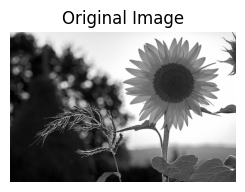

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

(-0.5, 597.5, 397.5, -0.5)

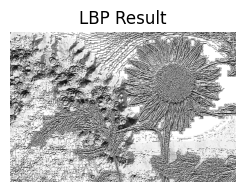

In [ ]:
plt.subplot(1, 2, 2)
plt.imshow(lbp_result, cmap='gray')
plt.title('LBP Result')
plt.axis('off')
